# Assignment 3: Clustering

Szymon Siemieniuk 151947

Nikita Makarevich 153989

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.utils.random import sample_without_replacement
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


df_data = pd.read_csv('data/data.csv')

In [2]:
df_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
cat_features = [
    'f_07',
    'f_08',
    'f_09',
    'f_10',
    'f_11',
    'f_12',
    'f_13'
]
df_cat = df_data[cat_features]

num_features = list(set(df_data.columns) - set(cat_features) - set('id'))
df_num = df_data[num_features]

columns = num_features
columns.extend(cat_features)

df_data = df_data[columns]

In [4]:
df_cat

,f_07,f_08,f_09,f_10,f_11,f_12,f_13
0,2,13,14,5,13,6,6
1,2,3,6,4,6,16,9
2,5,11,5,8,9,3,11
3,6,2,13,8,9,6,4
4,8,7,5,3,1,13,11
...,...,...,...,...,...,...,...
97995,5,7,8,5,7,6,7
97996,3,9,2,5,3,11,12
97997,8,9,10,7,5,4,3
97998,1,8,11,11,3,9,5


In [5]:
np.sort(df_cat.iloc[:, 6].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30])

In [15]:
scaler = StandardScaler().fit(df_num)
norm = StandardScaler().fit(df_cat)

df_scaled = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)

df_scaled[df_cat.columns] = norm.transform(df_cat)

df_scaled.drop(columns=['id'], inplace=True)

In [16]:
df_scaled.head()

,f_05,f_20,f_04,f_28,f_18,f_26,f_27,f_06,f_19,f_21,...,f_03,f_14,f_16,f_07,f_08,f_09,f_10,f_11,f_12,f_13
0,0.734849,-0.754257,-0.824775,0.683323,-0.362972,0.960482,1.045296,2.267432,-0.471839,-0.762195,...,0.589499,-0.473738,1.059236,-0.960479,1.502035,0.983395,-0.650584,1.171053,-0.242797,-0.069441
1,0.864967,-0.089129,-1.644472,-1.602671,0.478499,-0.552942,0.355435,-0.087835,-0.422434,-1.783073,...,0.995533,0.588248,0.139972,-0.960479,-0.906254,-0.371415,-0.863341,-0.496771,2.012866,0.658704
2,0.785146,-1.597140,0.108638,-2.224327,0.298074,0.979171,-0.926250,1.996476,-0.407243,1.193015,...,-0.623531,-0.684017,0.343316,-0.147872,1.020377,-0.540766,-0.012314,0.218011,-0.919496,1.144134
3,-1.219016,1.284518,0.417259,0.307002,-1.150052,-0.397908,-0.114228,0.142257,0.621083,0.534669,...,0.232124,-0.393288,-1.076425,0.122997,-1.147082,0.814044,-0.012314,0.218011,-0.242797,-0.554872
4,-1.850223,-0.433152,-0.285713,-1.149094,0.435485,1.166086,-0.385886,0.786963,-1.617255,0.324273,...,-1.828801,-0.124288,-1.066274,0.664735,0.057062,-0.540766,-1.076098,-1.688074,1.336167,1.144134


In [22]:
pca = PCA(n_components=10)
new_df_scaled = pca.fit_transform(df_scaled)
df_scaled = pd.DataFrame(new_df_scaled)

In [23]:
df_scaled

,0,1,2,3,4,5,6,7,8,9
0,-0.693154,0.076367,-1.314917,0.352749,1.573830,0.608751,-1.358852,-0.447457,-0.145332,-0.711670
1,-0.974019,-0.873885,1.614359,-1.425829,-1.197274,-0.628548,-0.542729,0.883065,0.200453,1.163249
2,-1.406895,0.680719,-1.294783,-0.296079,0.098884,-0.331807,-1.067587,-0.204933,-1.303915,-1.165509
3,1.190552,0.153226,0.104981,-1.451529,-0.540389,0.437417,1.427609,-0.281820,0.551401,-0.642952
4,-0.983175,-0.021078,1.663401,-1.468792,-1.360049,-0.787403,2.372678,-0.937296,-0.673030,-0.628045
...,...,...,...,...,...,...,...,...,...,...
97995,-0.286248,0.081659,0.189507,-1.165436,0.189008,0.754625,-0.801764,0.120370,-1.099185,0.610815
97996,-1.977907,-0.883067,1.091777,0.307379,0.085019,0.212137,0.099662,-1.167015,1.405823,0.727414
97997,0.586155,-0.691205,-1.081800,-0.200503,0.653852,1.096042,1.203144,-1.021455,-1.625721,-0.490392
97998,0.482478,-1.333248,-0.096379,0.345568,-1.031488,-0.574944,0.368278,-0.131852,0.160109,1.710113


In [25]:
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9
count,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04
mean,2.378143e-17,1.798108e-17,1.395709e-17,-3.429456e-17,2.465148e-18,2.146129e-17,-2.639159e-17,-1.392084e-17,-3.074185e-17,-1.424711e-17
std,1.348207e+00,1.207094e+00,1.141475e+00,1.061856e+00,1.049975e+00,1.022515e+00,1.008692e+00,1.003490e+00,1.001400e+00,1.000479e+00
min,-4.515005e+00,-5.251224e+00,-4.773852e+00,-4.594085e+00,-4.157578e+00,-4.236045e+00,-4.568747e+00,-4.437919e+00,-4.559059e+00,-3.954707e+00
25%,-9.152809e-01,-8.192529e-01,-7.800443e-01,-7.164679e-01,-7.139119e-01,-6.955284e-01,-6.787344e-01,-6.760083e-01,-6.748498e-01,-6.743864e-01
50%,-1.651001e-01,9.012007e-03,-1.230630e-02,-1.244448e-02,-7.563406e-03,-2.191989e-02,-4.365459e-04,-1.113340e-03,2.788644e-03,-8.623756e-04
75%,7.823614e-01,8.325670e-01,7.687895e-01,7.105360e-01,6.997973e-01,6.826153e-01,6.795717e-01,6.757028e-01,6.746576e-01,6.744113e-01
max,5.967965e+00,5.304363e+00,5.479649e+00,4.972896e+00,4.418742e+00,4.935267e+00,4.673805e+00,4.460455e+00,4.757774e+00,4.216194e+00


In [28]:
RANDOM_STATE = 420
SAMPLE_SIZE = 10000

silhouette_scores = []
bouldin_scores = []
ns_clusters = list(range(2, 50, 3))

for n_clusters in ns_clusters:
    print(f"Computing for n_clusters: {n_clusters}")
    indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
    sampled_df_scaled = df_scaled.iloc[indices]

    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init="auto", verbose=False)
    kmeans.fit(sampled_df_scaled)

    labels = kmeans.predict(sampled_df_scaled)
    silhouette_scores.append(silhouette_score(sampled_df_scaled, labels))
    bouldin_scores.append(davies_bouldin_score(sampled_df_scaled, labels))


Computing for n_clusters: 2
Computing for n_clusters: 5
Computing for n_clusters: 8
Computing for n_clusters: 11
Computing for n_clusters: 14
Computing for n_clusters: 17
Computing for n_clusters: 20
Computing for n_clusters: 23
Computing for n_clusters: 26
Computing for n_clusters: 29
Computing for n_clusters: 32
Computing for n_clusters: 35
Computing for n_clusters: 38
Computing for n_clusters: 41
Computing for n_clusters: 44
Computing for n_clusters: 47


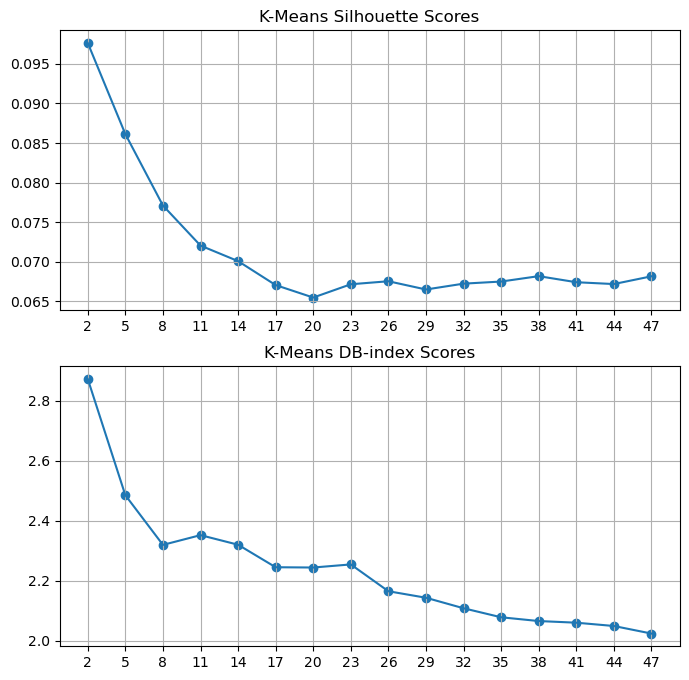

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(ns_clusters, silhouette_scores)
axs[0].scatter(ns_clusters, silhouette_scores)
axs[0].set_title("K-Means Silhouette Scores")
axs[0].set_xticks(ns_clusters)
axs[0].grid()

axs[1].plot(ns_clusters, bouldin_scores)
axs[1].scatter(ns_clusters, bouldin_scores)
axs[1].set_title("K-Means DB-index Scores")
axs[1].set_xticks(ns_clusters)
axs[1].grid()

plt.show()

In [33]:
N_TRIALS = 10000
dists = []
for _ in range(N_TRIALS):
    inds = sample_without_replacement(len(df_scaled), 2)
    dist = np.linalg.norm(df_scaled.iloc[inds[0]] - df_scaled.iloc[inds[1]])
    dists.append(dist)

In [34]:
np.mean(dists)

4.7561166059530136

In [13]:
def dbscan_grid(epsilons, mins_samples, scorer=davies_bouldin_score):
    results = np.zeros(shape=(len(epsilons), len(mins_samples)))
    for i, eps in enumerate(epsilons):
        for j, min_samples in enumerate(mins_samples):
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(df_scaled)
            results[i, j] = scorer(df_scaled, labels)
    return results

epsilons = np.linspace(0.45, 0.45667, 5)
mins_samples = np.arange(2, 8)
dbscan_bouldin_scores = []

results = dbscan_grid(epsilons, mins_samples, scorer=davies_bouldin_score)

KeyboardInterrupt: 

<Axes: >

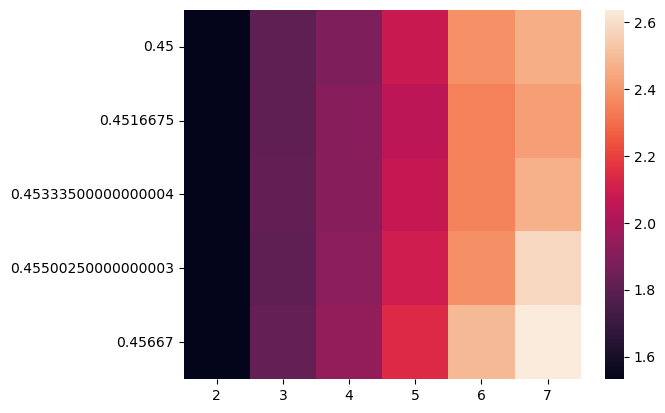

In [ ]:
sns.heatmap(results, xticklabels=mins_samples, yticklabels=epsilons)

In [39]:
dbscan = DBSCAN(eps=1.4, min_samples=9)
labels = dbscan.fit_predict(df_scaled)

label_ids, label_counts = np.unique(labels, return_counts=True)
dbscan_results = pd.DataFrame()
dbscan_results["Label"] = label_ids
dbscan_results["Counts"] = label_counts

dbscan_results

,Label,Counts
0,-1,39695
1,0,58299
2,1,6


## Cluster visualization

In [64]:
def plot_clusters(X, labels_list, n_components=2, model_names=None):
    m = int(np.sqrt(len(labels_list)))
    n = int(np.ceil(len(labels_list) / m))
    fig, axs = plt.subplots(m, n, figsize=(5*n, 5*m))
    axs = np.reshape(axs, newshape=(m, n))
    
    labels_list += [None]*(m*n-len(labels_list))
    labels_list = np.reshape(labels_list, newshape=(m, n, len(X)))

    pca = PCA(n_components=n_components)
    for i in range(m):
        for j in range(n):
            labels = labels_list[i, j]
            ax = axs[i, j]
            X_new = pca.fit_transform(X, labels)
            scatter = ax.scatter(x=X_new[:, 0], y=X_new[:, 1], c=labels, alpha=0.5)
            if model_names is not None:
                ax.set_title(model_names[i+j])
            ax.legend(*scatter.legend_elements(), title="Clusters")

def plot_cluster_distances_heatmap(X, labels_list, dist_metrics_list, model_names=None):
    m, n = len(labels_list), len(dist_metrics_list)
    fig, axs = plt.subplots(m, n, figsize=(3*n, 3*m))
    axs = np.reshape(axs, newshape=(len(labels_list), len(dist_metrics_list)))

    for plot_i, labels in enumerate(labels_list):
        for plot_j, dist_metric in enumerate(dist_metrics_list):
            unique_labels = np.unique(labels)
            n_clusters = len(unique_labels)

            dist_matrix = np.zeros(shape=(n_clusters, n_clusters))

            for i, label1 in enumerate(unique_labels):
                for j, label2 in enumerate(unique_labels):
                    if i > j:
                        dist_matrix[i, j] = dist_matrix[j, i]
                        continue

                    dist_matrix[i, j] = dist_metric(X[labels==label1], X[labels==label2])

            sns.heatmap(dist_matrix, xticklabels=unique_labels, yticklabels=unique_labels, ax=axs[plot_i, plot_j])

            
            if plot_i == 0:
                axs[plot_i, plot_j].set_title(dist_metric.__name__)
            if model_names is not None and plot_j == 0:
                axs[plot_i, plot_j].set_ylabel(model_names[plot_i])

In [65]:
from sklearn.utils.random import sample_without_replacement

def euclidean_distance_between_centroids(X1: pd.DataFrame, X2: pd.DataFrame):
    centroid1, centroid2 = X1.mean(axis=0), X2.mean(axis=0)
    result = np.linalg.norm(centroid1-centroid2)
    return result

def euclidean_distance_avg(X1: pd.DataFrame, X2: pd.DataFrame, sample_size=50):
    dists = np.zeros(shape=(sample_size, sample_size))
    
    X1_sample_inds = sample_without_replacement(len(X1), sample_size)
    X2_sample_inds = sample_without_replacement(len(X2), sample_size)
    for i, ind1 in enumerate(X1_sample_inds):
        for j, ind2 in enumerate(X2_sample_inds):
            dists[i, j] = np.linalg.norm(X1.iloc[ind1, :] - X2.iloc[ind2, :])

    return dists.mean()

def canberra_distance_avg(X1: pd.DataFrame, X2: pd.DataFrame, sample_size=50):
    dists = np.zeros(shape=(sample_size, sample_size))

    X1_sample_inds = sample_without_replacement(len(X1), sample_size)
    X2_sample_inds = sample_without_replacement(len(X2), sample_size)
    for i, ind1 in enumerate(X1_sample_inds):
        for j, ind2 in enumerate(X2_sample_inds):
            row1, row2 = X1.iloc[ind1, :], X2.iloc[ind2, :]
            dists[i, j] = np.sum(np.abs(row1 - row2) / (np.abs(row1) + np.abs(row2)))
    return dists.mean()

In [48]:
### TEMPORARY CELLS FOR TESTING

indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
sampled_df_scaled = df_scaled.iloc[indices]

kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init="auto", verbose=False)
kmeans.fit(sampled_df_scaled)

labels = kmeans.predict(df_scaled)
labels_kek = np.array([0]*49000 + [1]*49000)

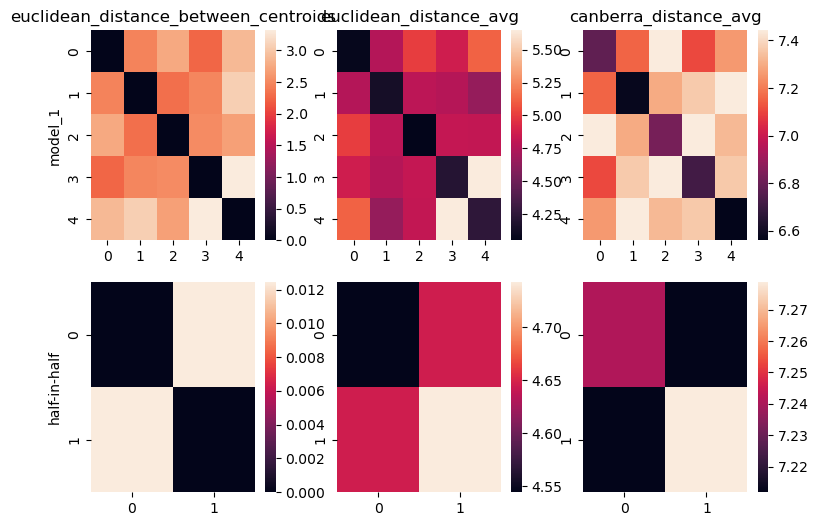

In [49]:
plot_cluster_distances_heatmap(
    df_scaled, 
    [labels, labels_kek], 
    [euclidean_distance_between_centroids, euclidean_distance_avg, canberra_distance_avg], 
    model_names=["model_1", "half-in-half"]
)

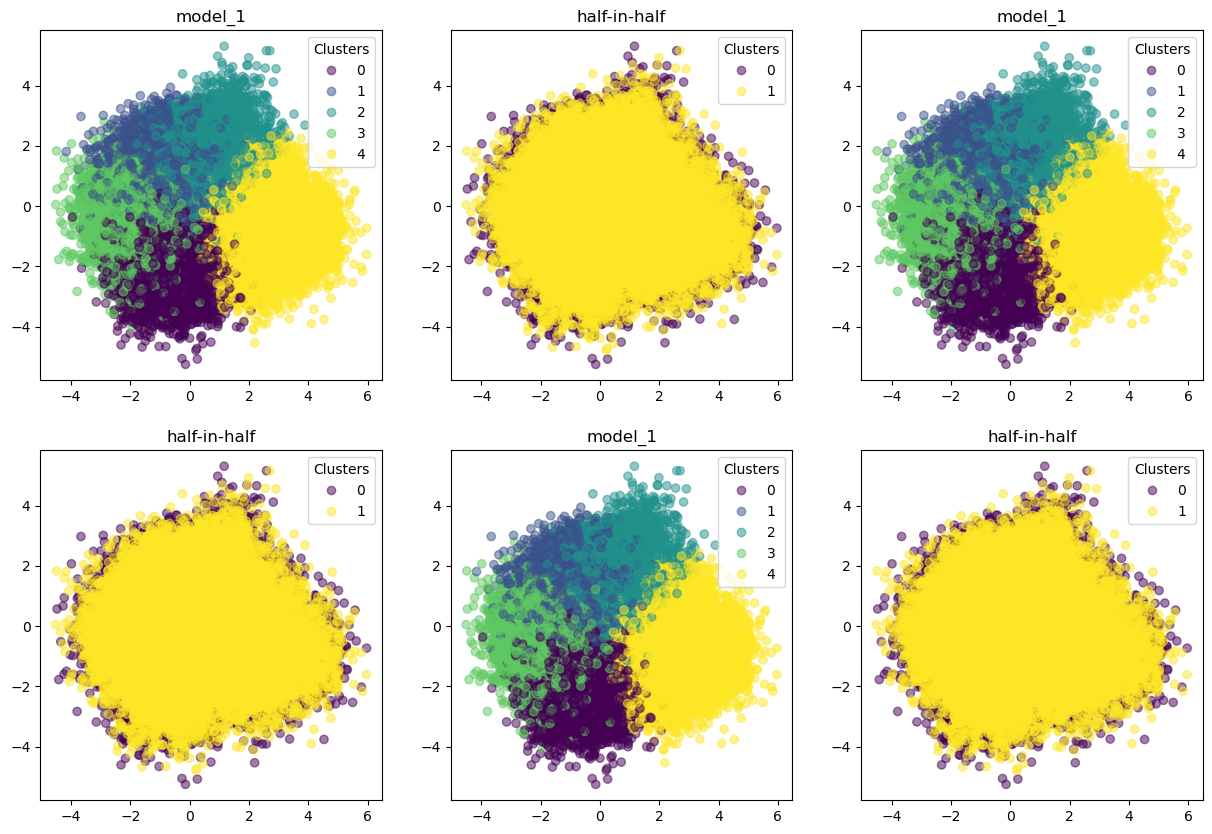

In [67]:
plot_clusters(
    df_scaled, 
    [labels, labels_kek]*3,
    model_names=["model_1", "half-in-half"]*3
)